# GSoC update for PySAL 08/07/2020 meeting

The following table summarizes the progress made across the GSOC objectives:

| Function              | Generating correct values | Generating correct inference | Documentation | Pull request | Overall, complete?      |
|-----------------------|---------------------------|------------------------------|---------------|--------------|-------------------------|
| `LOSH`                | Yes                       | Yes                          | Yes           | [PR#139](https://github.com/pysal/esda/pull/139)     | Yes |
| `Local_Join_Count` <br> (univariate)      | Yes        | Yes                          | Yes           | [PR#139](https://github.com/pysal/esda/pull/139)     | Yes |
| `Local_Join_Count_BV` <br> (bivariate)    | Yes        | Yes                          | Yes           | [PR#139](https://github.com/pysal/esda/pull/139)     | Yes |
| `Local_Join_Count_MV` <br> (multivariate) | Yes        | Yes                          | Yes           | [PR#139](https://github.com/pysal/esda/pull/139)     | Yes |
| `Local_Geary` <br> (univariate)           | Yes        | Yes <br> (Need to add GeoDa quads)                         | In progress   | TBD | Almost |
| `Local_Geary_MV` <br> (multivariate)      | Yes <br> (squared differences)        | No                           | In progress   | TBD | No |


# Quick demo of LOSH function

- [Link to documentation](https://github.com/jeffcsauer/GSOC2020/blob/master/docs/LOSH.ipynb)

- [Link to function](https://github.com/jeffcsauer/GSOC2020/blob/master/functions/losh.py)

In [1]:
from esda.losh import losh

In [2]:
#help(losh)

In [3]:
from libpysal import weights
import numpy as np
import geopandas as gpd
denver = gpd.read_file('https://github.com/jeffcsauer/GSOC2020/raw/master/validation/data/denver/denver.gpkg')
wq_denver_rs = weights.Queen.from_dataframe(denver)
wq_denver_rs.transform = 'r'
losh_denver = losh(connectivity=wq_denver_rs, inference="chi-square").fit(denver['HU_RENTED'])
# Place LOSH values in dataset
denver['HU_RENTED_Hi'] = losh_denver.Hi
# Or p-values: denver['HU_RENTED_Hi'] = losh_denver.pval

<AxesSubplot:>

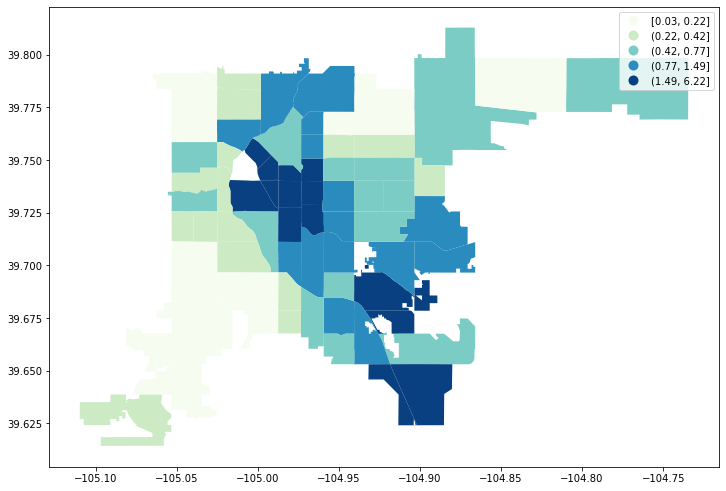

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
denver.plot(column='HU_RENTED_Hi', scheme='Quantiles', 
               k=5, cmap='GnBu', 
               legend=True, ax=ax)

# Quick demo of LJC

- [Link to documentation](https://github.com/jeffcsauer/GSOC2020/blob/master/docs/localjoincounts.ipynb)

- [Link to functions](https://github.com/jeffcsauer/GSOC2020/tree/master/functions)

In [5]:
from esda.local_join_count import Local_Join_Count

In [6]:
#help(Local_Join_Count)

In [7]:
import libpysal
import geopandas as gpd
guerry = libpysal.examples.load_example('Guerry')
guerry_ds = gpd.read_file(guerry.get_path('Guerry.shp'))
guerry_ds['SELECTED'] = 0
# Select values in top 20%
guerry_ds.loc[(guerry_ds['Donatns'] > 10997), 'SELECTED'] = 1
w = libpysal.weights.Queen.from_dataframe(guerry_ds)
LJC_uni = Local_Join_Count(connectivity=w).fit(guerry_ds['SELECTED'])
# Place back in dataset
guerry_ds['Donatns_q5_LJC_UNI'] = LJC_uni.LJC
# Or p-values: guerry_ds['Donatns_q5_LJC_UNI_p_sim'] = LJC_uni.p_sim

<AxesSubplot:>

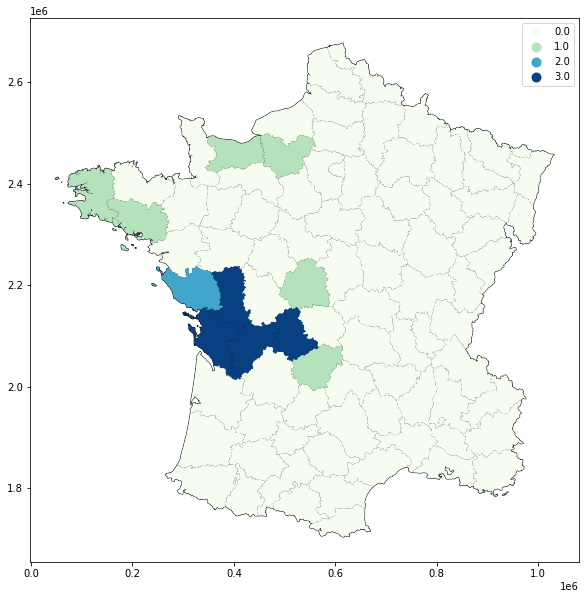

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='Donatns_q5_LJC_UNI',
               categorical=True,
               cmap='GnBu',
               legend=True, ax=ax)

# To-do for final month of GSOC2020

- Continue experimenting with LOSH and conditional randomization
- Finish building local Geary estimators (docs and tests)
    - Challenge(s):
        - Multiple types of estimation user could request (Manhatten, Minkowski, etc)
        - Multivariate local Geary may need to use old `_crand()` engine, as current `numba` `_crand()` engine does not permit multivariate inputs